In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example Dataset Creation - EmployeeIDs and Compensation Data

In [2]:
# generate a random list of 4990 employee salaries with normal distribution. The last 10 will have the highest salaries and will be considered 'Officers'.
salaries = np.random.normal(150000, 50000, 4990)
officer_salaries = np.random.randint(270000, 300000, 10)

# round the salaries to the nearest 1,000
salaries = np.round(salaries / 1000) * 1000
officer_salaries = np.round(officer_salaries / 1000) * 1000

# clip the salaries to be between $50,000 and $250,000
salaries = np.clip(salaries, 50000, 250000)

# insert officer salaries into the main array
salaries = np.append(salaries, officer_salaries)

# create a list of 5000 employeeids
employeeids = range(1, 5000 + 1)

# create a dataframe with employee ids and salaries
data = {'employeeid': employeeids, 'annual_salary': salaries}
        
df = pd.DataFrame(data)
df

,employeeid,annual_salary
0,1,123000.0
1,2,110000.0
2,3,97000.0
3,4,170000.0
4,5,237000.0
...,...,...
4995,4996,299000.0
4996,4997,281000.0
4997,4998,272000.0
4998,4999,275000.0


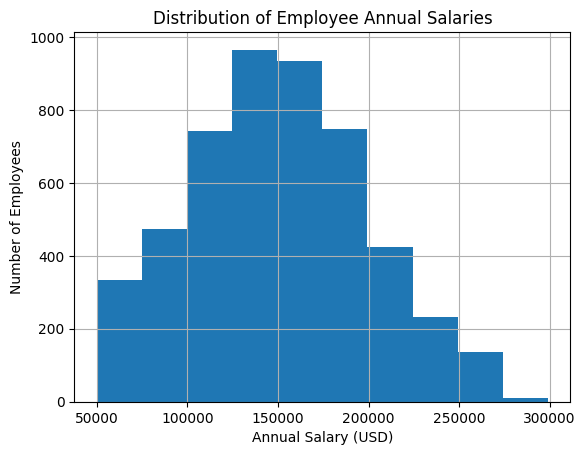

In [3]:
# plot the distribution of the annual salaries
plt.hist(df['annual_salary'])
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employee Annual Salaries')
plt.grid(True)
plt.show()

In [4]:
# create compensation grade J-O
thresholds = [75000, 110000, 150000, 200000, 250000]
grade_map = ["J", "K", "L", "M", "N"]

for index, row in df.iterrows():
    salary = row['annual_salary']
    for i, threshold in enumerate(thresholds):
        if salary > threshold:
            continue
        df.at[index, 'comp_grade'] = grade_map[i]
        assigned_grade = True
        break
    else:
        df.at[index, 'comp_grade'] = 'O'
    
df[['comp_grade', 'annual_salary']].groupby('comp_grade').mean('annual_salary')

,annual_salary
comp_grade,
J,59820.512821
K,95006.747638
L,131194.822888
M,173658.668266
N,225735.255570
O,286800.000000


In [5]:
# calculate compa-ratio for each employee
band_midpoints = {'J': 62500, 'K': 92500, 'L': 130000, 'M': 175000, 'N': 225000}

df['band_midpoint'] = df['comp_grade'].map(band_midpoints)
df['compa_ratio'] = df['annual_salary'] / df['band_midpoint']

df['compa_ratio'] = df['compa_ratio'].fillna(1)

df

,employeeid,annual_salary,comp_grade,band_midpoint,compa_ratio
0,1,123000.0,L,130000.0,0.946154
1,2,110000.0,K,92500.0,1.189189
2,3,97000.0,K,92500.0,1.048649
3,4,170000.0,M,175000.0,0.971429
4,5,237000.0,N,225000.0,1.053333
...,...,...,...,...,...
4995,4996,299000.0,O,NaN,1.000000
4996,4997,281000.0,O,NaN,1.000000
4997,4998,272000.0,O,NaN,1.000000
4998,4999,275000.0,O,NaN,1.000000


In [6]:
# assign labels for gender and tech worker
df['gender'] = np.random.choice(['M', 'F'], 5000)
df['tech_worker'] = np.random.choice(['Tech', 'Non-Tech'], p=[.2, .8])

# assign labels for managers and individual contributors
for index, row in df.iterrows():
    if row['comp_grade'] in ('L', 'M', 'N'):
        df.at[index, 'manager'] = np.random.choice(['manager', 'IC'])
    if row['comp_grade'] == 'O':
        df.at[index, 'manager'] = 'manager'
    else:
        df.at[index, 'manager'] = 'IC'

In [7]:
df[['gender', 'tech_worker', 'manager', 'annual_salary', 'compa_ratio']].groupby(['gender', 'tech_worker', 'manager']).mean()

annual_salary  compa_ratio
gender tech_worker manager                            
F      Tech        IC       149309.656824     1.000793
                   manager  280600.000000     1.000000
M      Tech        IC       149575.684380     1.002518
                   manager  293000.000000     1.000000

# PandasAI + GUI Application

In [8]:
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from pandasai import SmartDataframe, Agent
from pandasai.llm.local_llm import LocalLLM
import streamlit as st

In [9]:
df

,employeeid,annual_salary,comp_grade,band_midpoint,compa_ratio,gender,tech_worker,manager
0,1,123000.0,L,130000.0,0.946154,F,Tech,IC
1,2,110000.0,K,92500.0,1.189189,F,Tech,IC
2,3,97000.0,K,92500.0,1.048649,F,Tech,IC
3,4,170000.0,M,175000.0,0.971429,F,Tech,IC
4,5,237000.0,N,225000.0,1.053333,F,Tech,IC
...,...,...,...,...,...,...,...,...
4995,4996,299000.0,O,NaN,1.000000,M,Tech,manager
4996,4997,281000.0,O,NaN,1.000000,F,Tech,manager
4997,4998,272000.0,O,NaN,1.000000,F,Tech,manager
4998,4999,275000.0,O,NaN,1.000000,M,Tech,manager


In [10]:
average_salaries_by_gender = df[['gender', 'annual_salary']].groupby('gender').mean('annual_salary')
average_salaries_by_gender

,annual_salary
gender,
F,149571.087216
M,149863.800723


In [11]:
load_dotenv()

True

In [81]:
os.environ["PANDASAI_API_KEY"] = os.getenv('YOUR_PANDASAIAPI_KEY')

llm = LocalLLM(api_base='http://localhost:1234/v1/', temperature=0.1)
agent = Agent(df, config={'llm':llm})

# Trained already so no need to rerun
# query = 'What is the average annual salary by gender?'
# response = """
# # Import necessary packages
# import pandas as pd

# # Copy the dataframe
# df = dfs[0]

# # Calculate the average annual salary by gender
# average_salaries_by_gender = df[['gender', 'annual_salary']].groupby('gender').mean()

# # Declare results variable
# result = {"type": "dataframe", "value": average_salaries_by_gender}
# """
# agent.train(queries=[query], codes=[response])

In [40]:
agent.chat('What is the average annual salary by gender?')

,Gender,Avg Annual Salary
0,F,149571.087216
1,M,149863.800723


In [47]:
agent.chat("Is the average salary of gender='M' employees higher than that of gender='F' employees?")

"True - The average salary for 'M' is 149863.800723182 and the average salary for 'F' is 149571.0872162485"

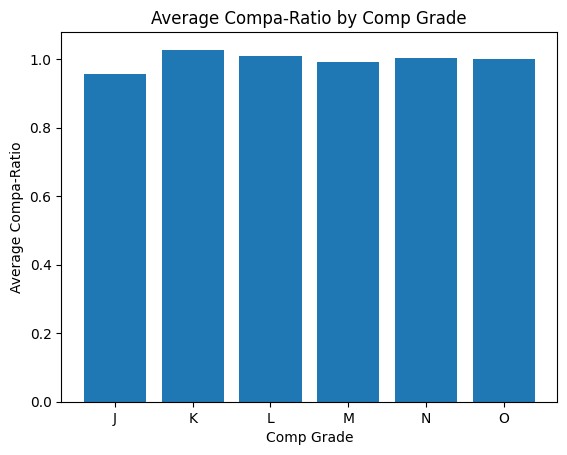

'C:/Users/leeha/git/text-to-insights-pandasai/exports/charts/temp_chart.png'

In [94]:
agent.chat("Visualize the average compa-ratio by comp grade in a bar chart. Use plt.show.")